# Compare different optimality criteria

In [1]:
import sys
sys.path.append('/Users/jdiedrichsen/Python/MultiTaskBattery/MultiTaskBattery')
import numpy as np 
from numpy.linalg import inv,eig,eigh
import PcmPy as pcm
import matplotlib.pyplot as plt
import optimal_battery as ob

In [2]:
N = 8 
U = np.random.normal(0,1,(N,10))
H = pcm.matrix.centering(N)


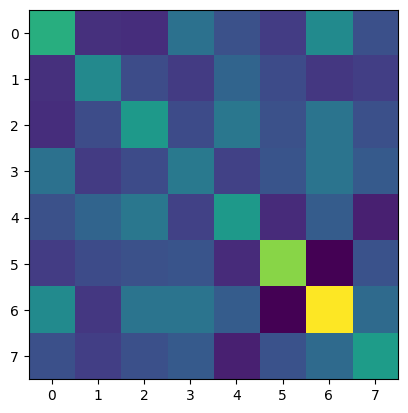

In [3]:
G = U @ U.T
Gc = H @ G @ H
plt.imshow(G)

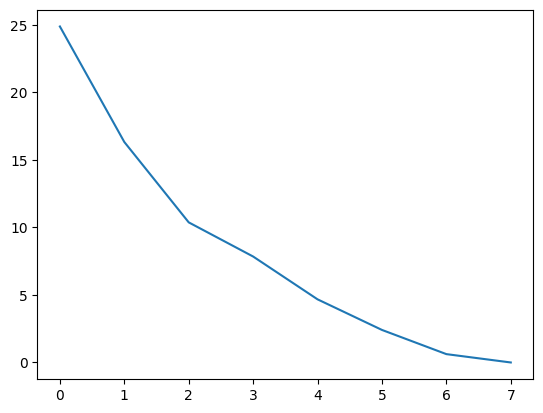

In [4]:
l,V = eigh(Gc)
l = l[::-1]
plt.plot(l)

In [5]:
li,Vi=eigh(inv(Gc))
print(li)
print(1./l)

[-2.00159983e+15 -4.97696780e-01 -1.52081354e-01  7.23538771e-02
  1.53482556e-01  3.99906122e-01  6.39188021e-01  3.47859756e+00]
[4.02040675e-02 6.12669680e-02 9.64167145e-02 1.27501968e-01
 2.13963425e-01 4.15149151e-01 1.61756173e+00 3.66793467e+14]


In [9]:
D=ob.build_combinations(G, strategy='random',n_iter=1000,n_tasks=4)
D

,offset,max_var,min_est,log_det,combination
0,0.000001,12.804213,2.000000e+06,-25.081247,"[0, 0, 4, 0]"
1,0.001000,12.807210,2.000078e+03,-11.265658,"[0, 0, 4, 0]"
2,0.100000,13.104210,2.007749e+01,-2.047617,"[0, 0, 4, 0]"
3,0.000001,21.915099,1.000000e+06,-9.124655,"[3, 1, 5, 1]"
4,0.001000,21.918096,1.000201e+03,-2.216698,"[3, 1, 5, 1]"
...,...,...,...,...,...
2995,0.001000,21.482249,6.537693e-01,5.294751,"[7, 2, 0, 3]"
2996,0.100000,21.779249,6.335805e-01,5.358462,"[7, 2, 0, 3]"
2997,0.000001,26.871729,4.357947e-01,6.180505,"[3, 1, 7, 6]"
2998,0.001000,26.874726,4.357161e-01,6.180940,"[3, 1, 7, 6]"


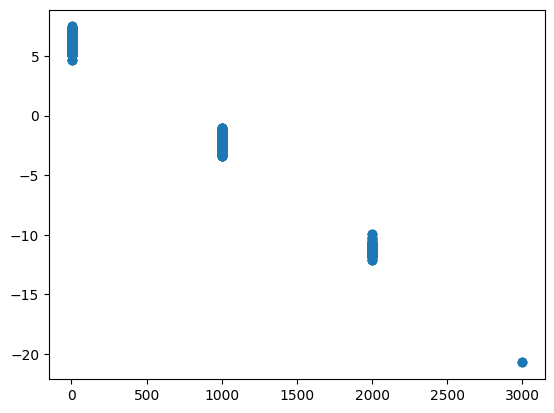

In [13]:
A= D[D.offset==0.001]
plt.scatter(A.min_est,A.log_det)